## 第55课 Conventional Neural Network(CNN)图像处理过程解析

Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.
The steps you are going to cover in this tutorial are as follows:

(1)Define Keras Model

(2)Load Data

(3)Compile Keras Model

(4)Fit Keras Model

(5)Evaluate Keras Model

(6)Make Predictions

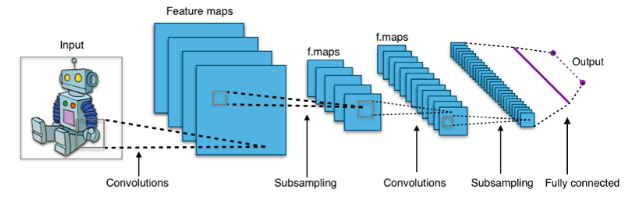

In [100]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson52-Image.png')

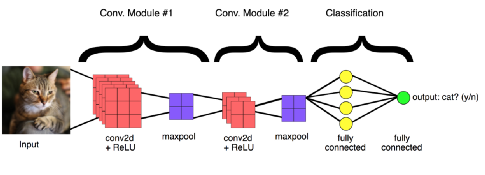

In [12]:
#Basically any Neural Network which is used for image processing, consist of following layers -
#Input layer, Convolutional Layer, Pooling Layer, Dense Layer.

from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson55-1.png')

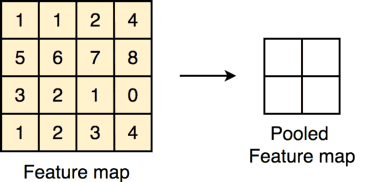

In [66]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson55-2.gif')

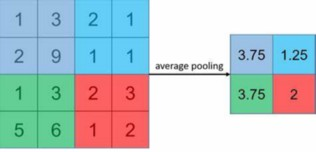

In [70]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson55-3.JPEG')

In [123]:
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
#can not pass output of convolutional layer directly to the dense layer because output of convolutional layer 
#is in multi-dimensional shape and dense layer requires input in single-dimensional shape i.e. 1-D array.
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
# make a prediction
image = x_train[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

(28, 28, 1) 10
Accuracy: 0.986
Predicted: class=5


In [114]:
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
#		[0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data

array([[0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0]])

In [116]:
data = data.reshape(7, 8, 1)
data

array([[[0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0]]])

In [120]:
### create model
model = Sequential()
model.add(Conv2D(3, (5,5), input_shape=(7, 8, 1)))
### summarize model
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 3, 4, 3)           78        
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________


In [121]:
#Flattening a tensor means to remove all of the dimensions except for one

#Here is a standalone example illustrating Flatten operator with the Keras Functional API

import numpy as np
from keras.layers import Input, Flatten
from keras.models import Model
inputs = Input(shape=(3,2,4))

#Define a model consisting only of the Flatten operation
prediction = Flatten()(inputs)
model = Model(inputs=inputs, outputs=prediction)

X = np.arange(0,24).reshape(1,3,2,4)
print(X)
#[[[[ 0  1  2  3]
#   [ 4  5  6  7]]
#
#  [[ 8  9 10 11]
#   [12 13 14 15]]
#
#  [[16 17 18 19]
#   [20 21 22 23]]]]

model.predict(X)
#array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
#         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
#         22.,  23.]], dtype=float32)

[[[[ 0  1  2  3]
   [ 4  5  6  7]]

  [[ 8  9 10 11]
   [12 13 14 15]]

  [[16 17 18 19]
   [20 21 22 23]]]]


array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]],
      dtype=float32)

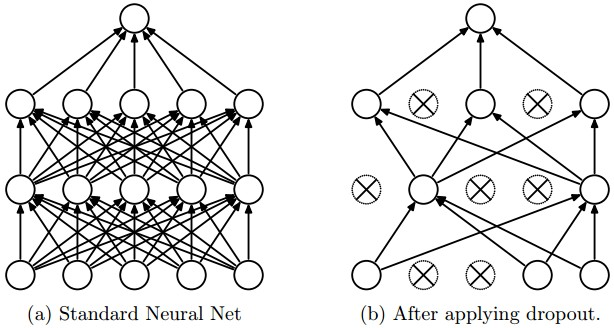

In [122]:
#Usually dropout is placed on the fully connected layers 
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson55-dropout.JPEG')